사용한 데이터 셋
https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m/data


https://zenodo.org/records/4322342#.Y8OsBdJBwUE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 한글 폰트 설정                            
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False ## 마이너스 부호 깨짐 방지

## 변수용어정리
- CLIENTNUM: 각 고객의 고유 식별자입니다. (정수)
- **`Attrition_Flag`**: 고객이 이탈했는지 여부를 나타내는 플래그입니다. (Boolean)
- Customer_Age: 고객의 나이. (정수)
- Gender: 고객의 성별. (문자열)
- Dependent_count: 고객이 가진 부양가족 수. (정수)
- Education_Level: 고객의 교육 수준. (문자열)
- Marital_Status: 고객의 결혼 상태. (문자열)
- Income_Category: 고객의 소득 범주. (문자열)
- Card_Category: 고객이 보유한 카드 유형입니다. (문자열)
- Months_on_book: 고객이 기록에 올라 있는 기간. (정수)
- Total_Relationship_Count: 고객이 신용카드 제공자와 맺은 관계의 총 수입니다. (정수)
- Months_Inactive_12_mon: 고객이 지난 12개월 동안 비활성 상태였던 개월 수입니다. (정수)
- Contacts_Count_12_mon: 고객이 지난 12개월 동안 연락한 횟수입니다. (정수)
- Credit_Limit: 고객의 신용 한도. (정수)
- Total_Revolving_Bal: 고객의 총 회전 잔액. (정수)
- Avg_Open_To_Buy: 고객의 평균 구매 비율. (정수)
- Total_Amt_Chng_Q4_Q1: 4분기에서 1분기로 변경된 총 금액입니다. (정수)
- Total_Trans_Amt: 총 거래 금액. (정수)
- Total_Trans_Ct: 총 거래 수. (정수)
- Total_Ct_Chng_Q4_Q1: 총 개수가 4분기에서 1분기로 변경되었습니다. (정수)
- Avg_Utilization_Ratio: 고객의 신용한도 평균 활용률 (신용 한도 대비 사용 비율). (정수)
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: 특성에 따라 누군가가 이탈할지 여부를 예측하기 위한 Naive Bayes 분류기

# 데이터셋

In [2]:
df = pd.read_csv("D:BankChurners.csv")

## Naive_Bayes 컬럼은 삭제 - 예측한 결과는 필요가 없다
df.drop(['CLIENTNUM',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

## Attrited Customer = 1, Existing Customer = 0 으로 수정
# df.replace({"Attrited Customer":1, "Existing Customer":0}, inplace=True)
df.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [3]:
## 중복 고객 데이터 확인
print("중복 데이터 : ", df.duplicated().sum())

## 결측치 확인
print("결측치\n", df.isnull().sum())

중복 데이터 :  0
결측치
 Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [4]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [5]:
## object 데이터 값 확인 - 분석하기 어려운 값은 없다. ('-', 해석하기 어렵거나 전처리가 필요한 형태가 없다.)
print(df.Attrition_Flag.unique())
print(df.Gender.unique())
print(df.Education_Level.unique())
print(df.Marital_Status.unique())
print(df.Income_Category.unique())
print(df.Card_Category.unique())

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


## 명목형 변수 EDA

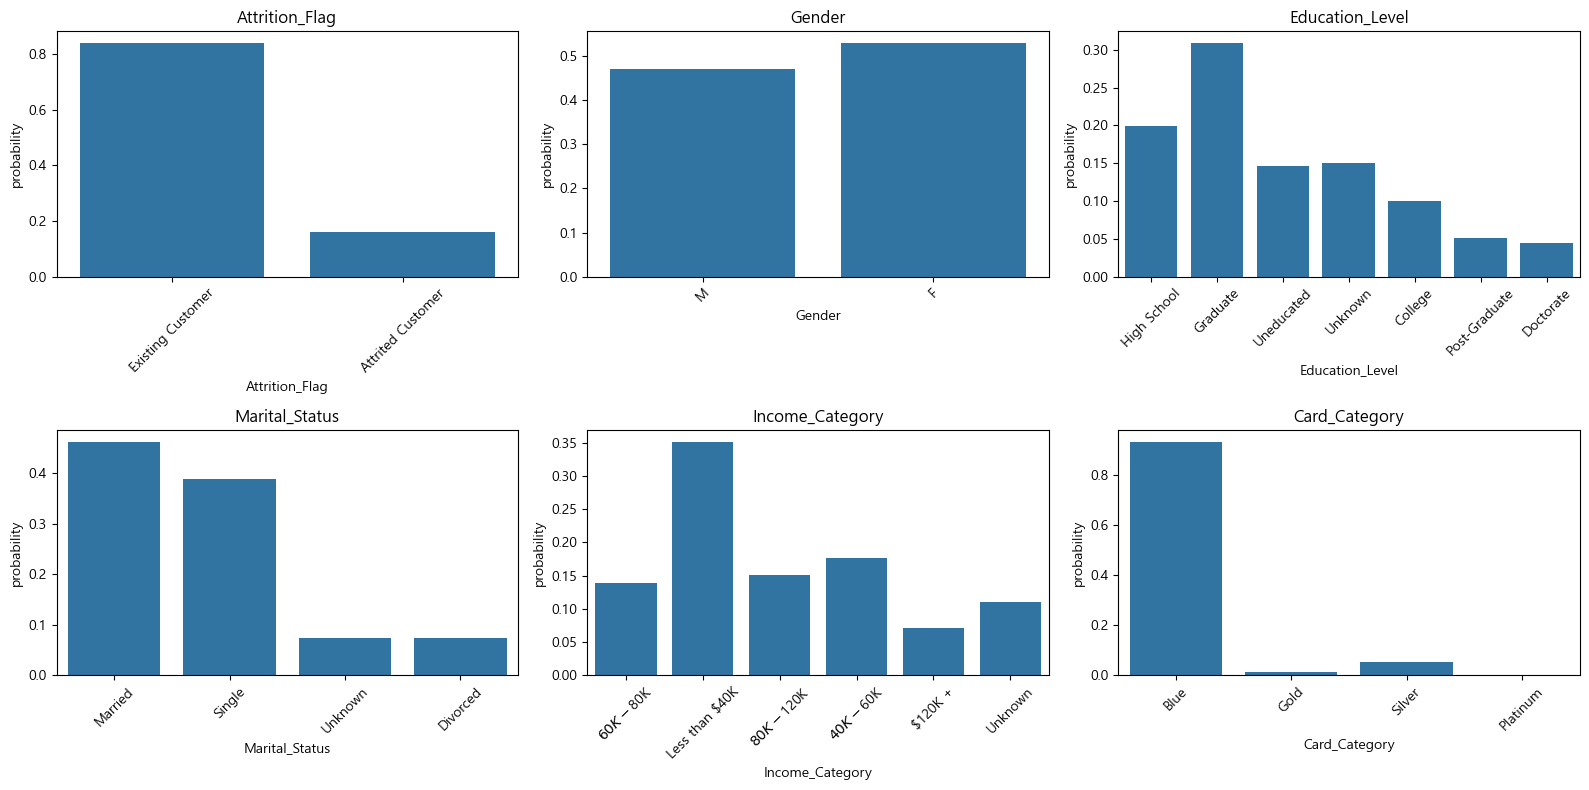

In [23]:
cols = list(df.select_dtypes('O').columns)
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for i, col in enumerate(cols):
    sns.countplot(data = df, x = col, ax=axes[i//3, i%3], stat = 'probability')
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%5].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

## 연속형 변수 EDA

In [ ]:
df[df.Year >= 2011].groupby(['Year','Country'])['Life_Expectancy'].mean().unstack()

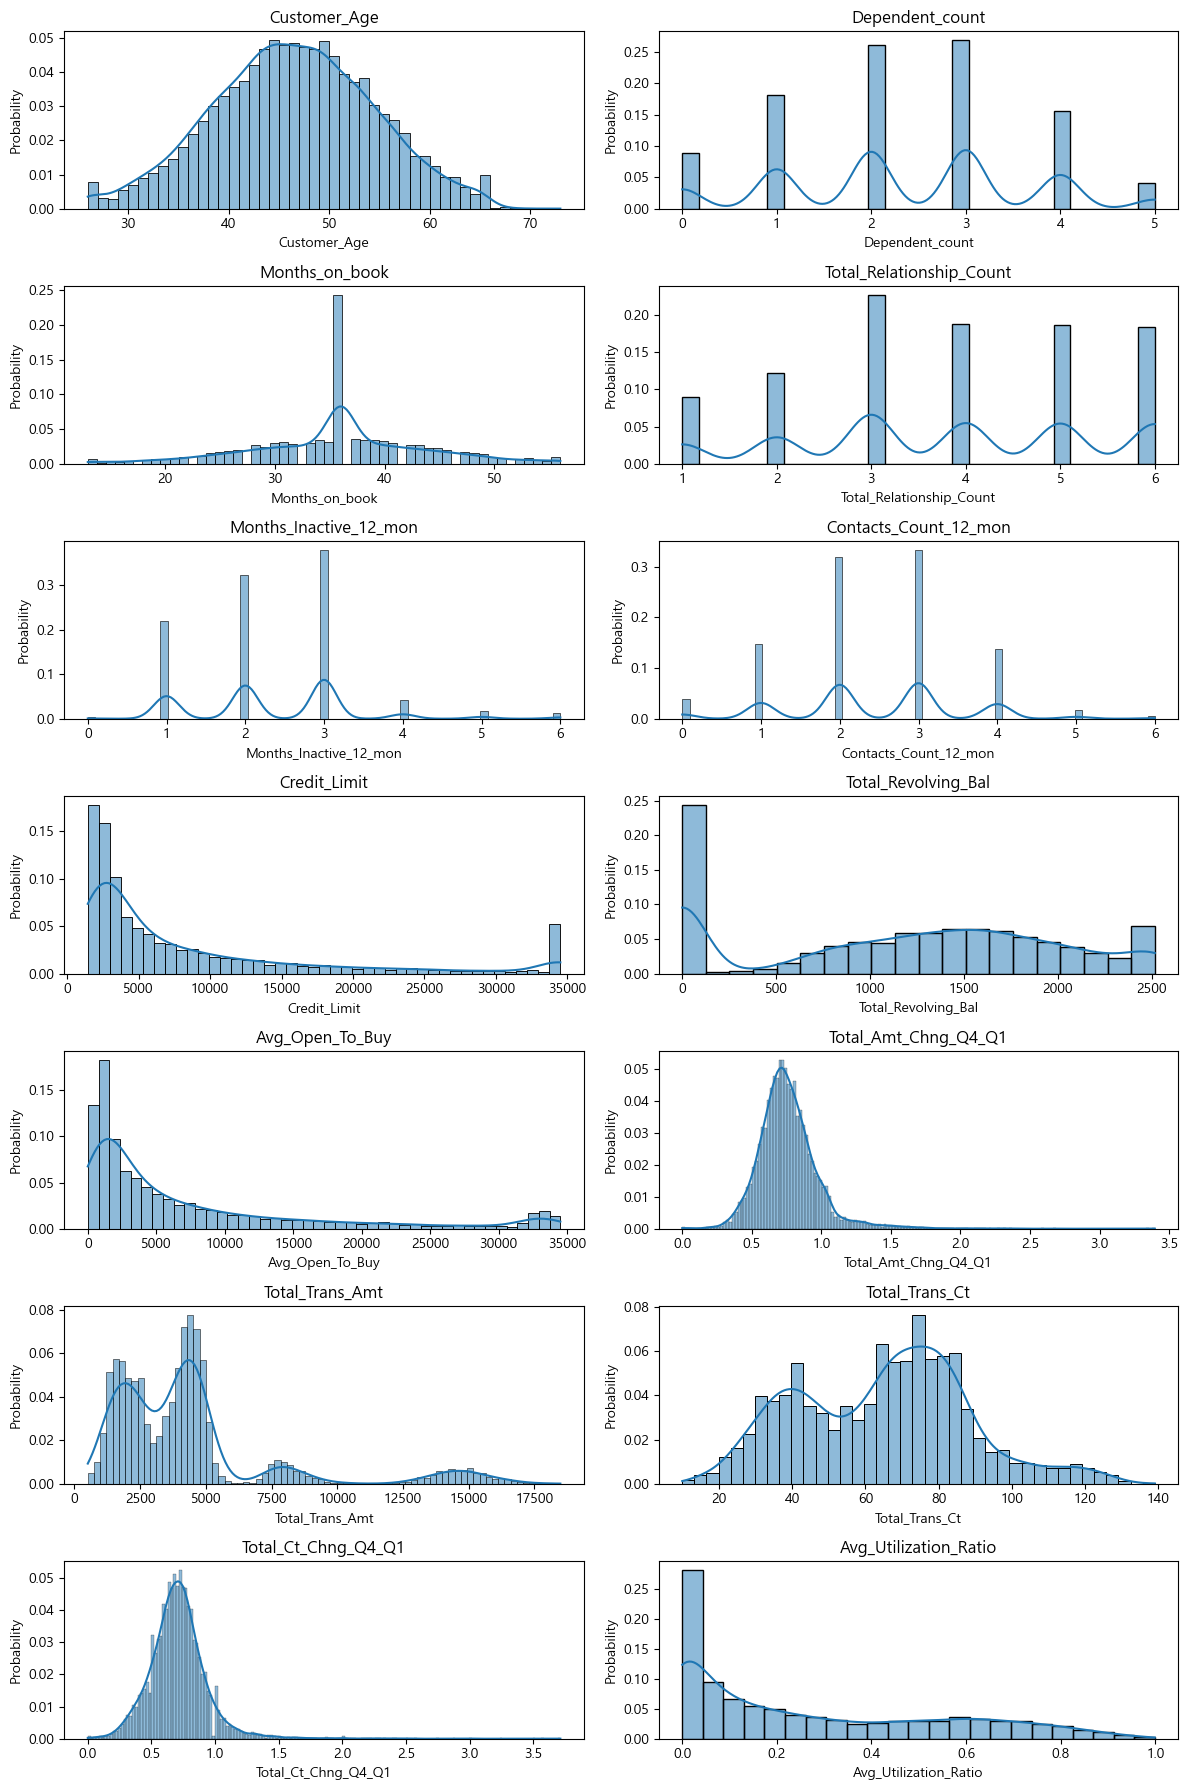

In [26]:
cols = list(df.describe().columns)
fig, axes = plt.subplots(7, 2, figsize=(12, 18))

for i, col in enumerate(cols):
    sns.histplot(df[col], ax=axes[i//2, i%2], kde=True, stat='probability')
    axes[i//2, i%2].set_title(col)
    
plt.tight_layout()
plt.show()

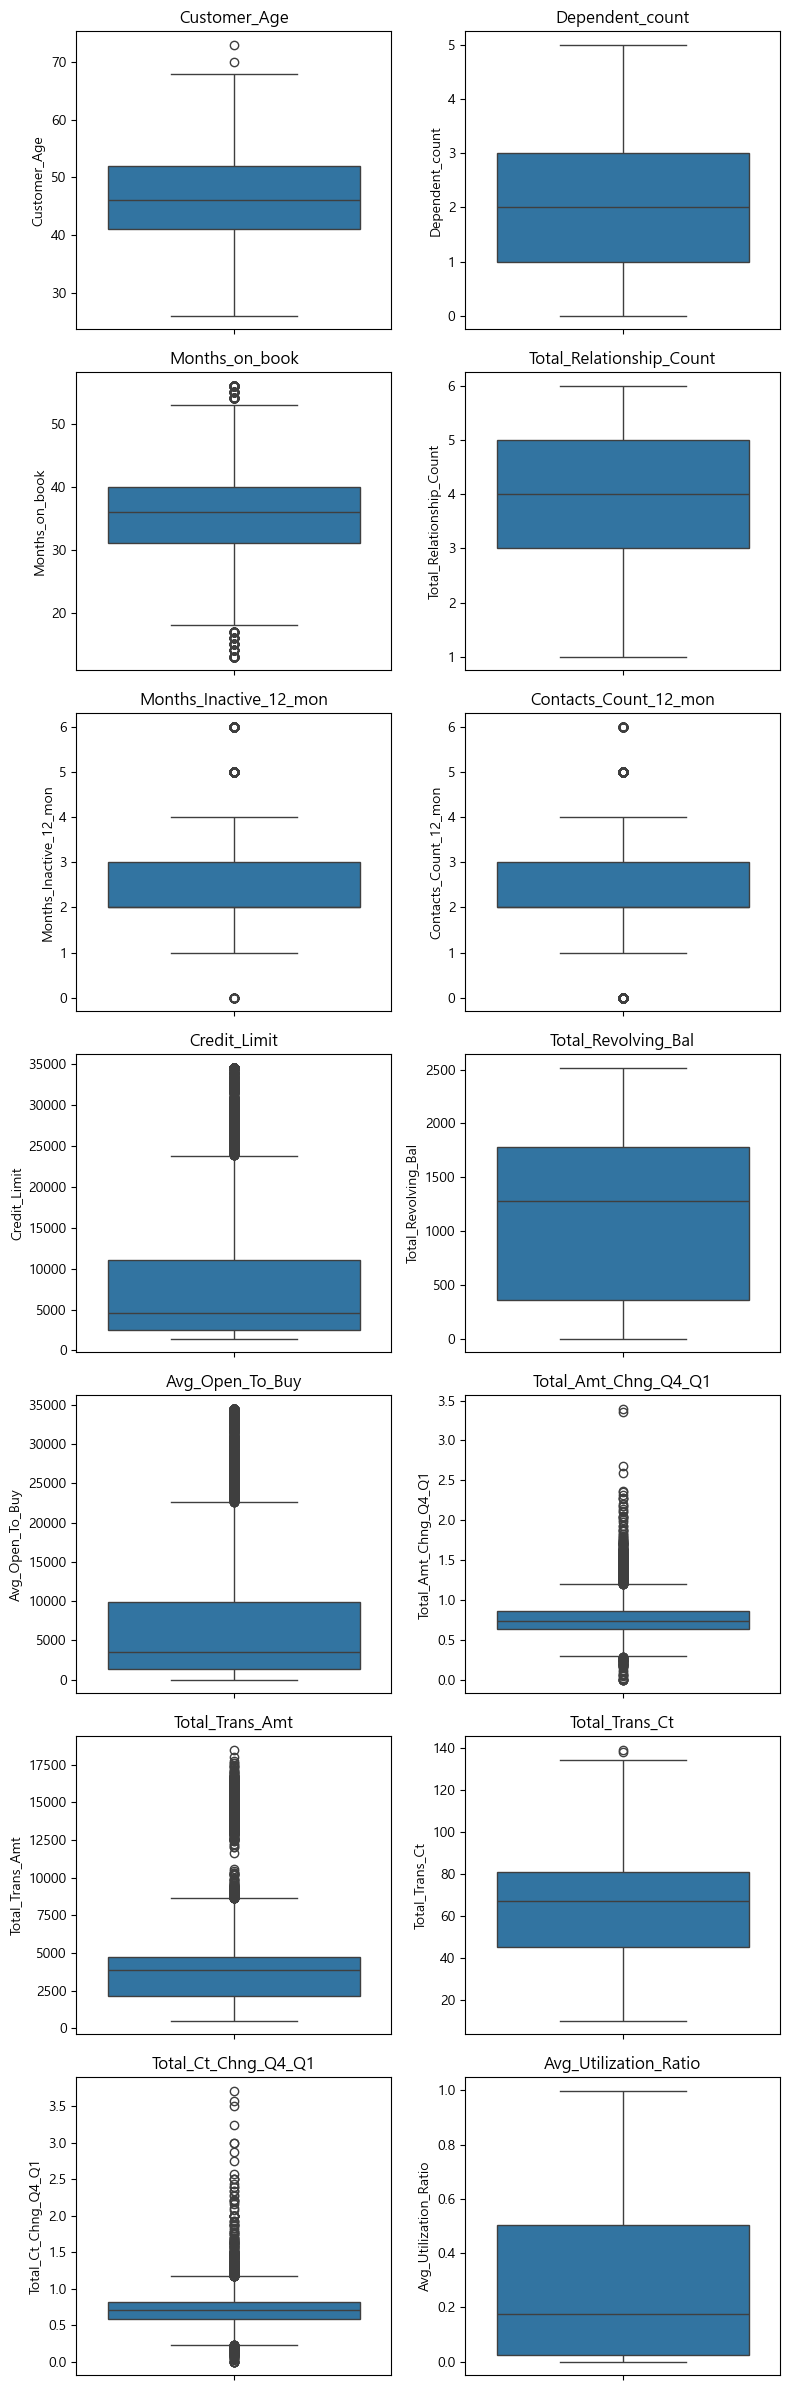

In [31]:
cols = list(df.describe().columns)
fig, axes = plt.subplots(7, 2, figsize=(8, 24))

for i, col in enumerate(cols):
    sns.boxplot(df[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    
plt.tight_layout()
plt.show()

In [53]:
# ## QQ-plot
# import scipy.stats as stats
# cols = list(df.describe().columns)
# fig, axes = plt.subplots(7, 2, figsize=(8,16))

# for i, col in enumerate(cols):
#     row, col_idx = divmod(i, 2)
#     stats.probplot(df[col], dist=stats.norm, plot=axes[row, col_idx])
#     axes[row, col_idx].set_title(col)

# plt.tight_layout()
# plt.show()

## 연속형 변수 중 범주형으로 변환

In [54]:
## 나이별 구간 컬럼 생성
def group_age(x):
    if x < 30:
        return '20대'
    elif 30 <= x < 40:
        return '30대'
    elif 40 <= x < 50:
        return '40대'
    elif 50 <= x < 60:
        return '50대'
    elif 60 <= x < 70:
        return '60대'
    else:
        return '70대'

df['age_group'] = df['Customer_Age'].apply(group_age) 
df['age_group'].head()

0    40대
1    40대
2    50대
3    40대
4    40대
Name: age_group, dtype: object

In [55]:
## 가입 기간별 구간 컬럼 생성
def group_month(x):
    if x < 24:
        return '1년이상2년미만'
    elif 24 <= x < 36:
        return '2년이상3년미만'
    elif 36 <= x < 48:
        return '3년이상4년미만'
    elif 48 <= x:
        return '4년이상'
        
df['Months_on_book_group'] = df['Months_on_book'].apply(group_month)
df['Months_on_book_group'].head()

0    3년이상4년미만
1    3년이상4년미만
2    3년이상4년미만
3    2년이상3년미만
4    1년이상2년미만
Name: Months_on_book_group, dtype: object

In [56]:
# sns.countplot(data = df, x='age_group', hue='Attrition_Flag',stat='probability')

## 상관 관계 확인

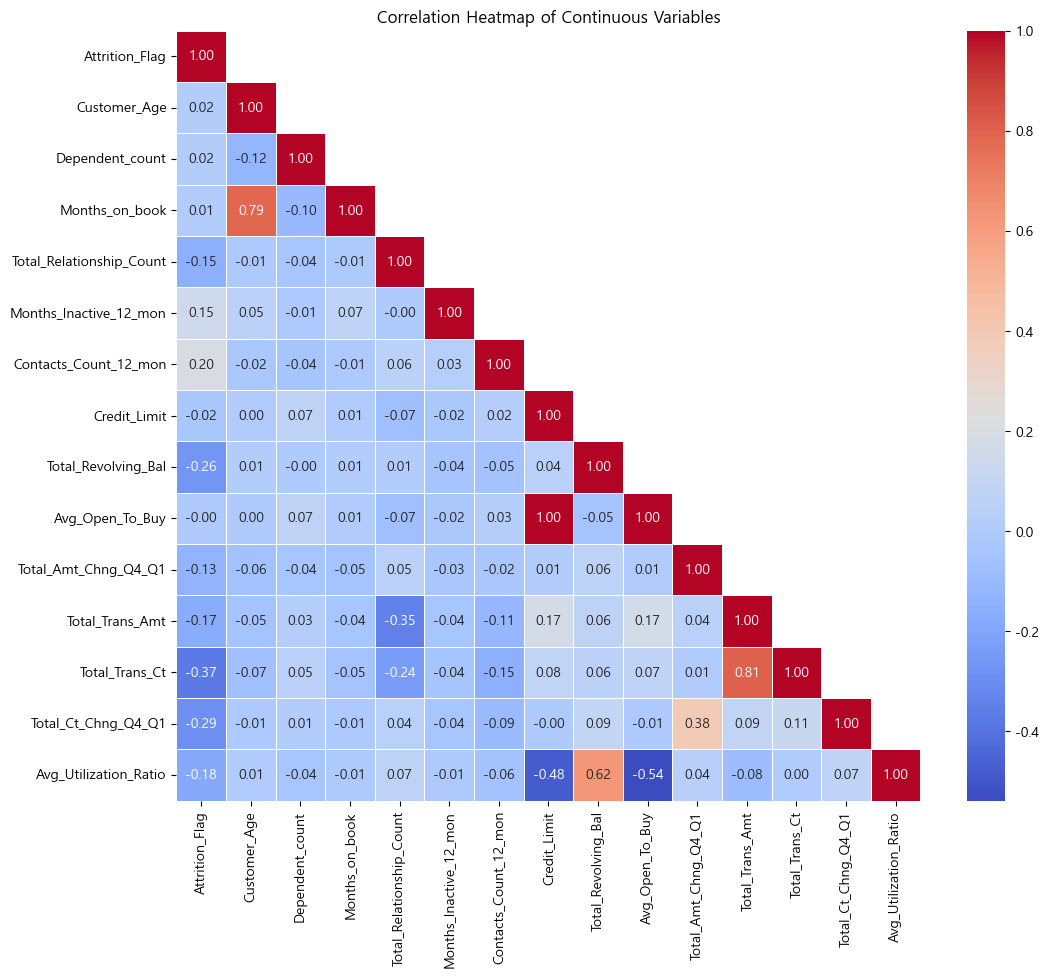

In [57]:
# 상관 행렬 계산
df2 = df.replace({"Attrited Customer":1, "Existing Customer":0}).copy() ## 종속 변수 정수형 타입으로 변환
corr_matrix = df2[list(df2.describe().columns)].corr()

# 마스크 생성
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# 히트맵 
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

In [129]:
# 임계치 설정
threshold = 0.7

# 상관계수 추출
positive_corr = [(corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
                 for i in range(len(corr_matrix))
                 for j in range(i + 1, len(corr_matrix))
                 if corr_matrix.iloc[i, j] >= threshold]

negative_corr = [(corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
                 for i in range(len(corr_matrix))
                 for j in range(i + 1, len(corr_matrix))
                 if corr_matrix.iloc[i, j] <= -threshold]

# 결과 출력
print("양의 상관계수 (임계치 이상):")
for pair in positive_corr:
    print(f"- {pair[0]} - {pair[1]}: {pair[2]:.2f}")

print("\n음의 상관계수 (임계치 이하):")
for pair in negative_corr:
    print(f"- {pair[0]} - {pair[1]}: {pair[2]:.2f}")

양의 상관계수 (임계치 이상):
- Customer_Age - Months_on_book: 0.79
- Credit_Limit - Avg_Open_To_Buy: 1.00
- Total_Revolving_Bal - Avg_Utilization_Ratio: 0.62
- Total_Trans_Amt - Total_Trans_Ct: 0.81

음의 상관계수 (임계치 이하):


### 상관관계
임계치 : `0.7`

양의 상관계수 (임계치 이상):
- Customer_Age - Months_on_book: 0.79
- Credit_Limit - Avg_Open_To_Buy: 1.00
- Total_Trans_Amt - Total_Trans_Ct: 0.81

음의 상관계수 (임계치 이하):

## 다중공선성 확인

In [60]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 데이터 분할
df_train, df_test = train_test_split(df2, test_size=0.4, random_state=0)

# 회귀 분석 모델 생성
formula = """
Attrition_Flag ~ Customer_Age + Dependent_count + Months_on_book + 
                 Total_Relationship_Count + Months_Inactive_12_mon + 
                 Contacts_Count_12_mon + Credit_Limit + Total_Revolving_Bal + 
                 Avg_Open_To_Buy + Total_Amt_Chng_Q4_Q1 + Total_Trans_Amt + 
                 Total_Trans_Ct + Total_Ct_Chng_Q4_Q1 + Avg_Utilization_Ratio
"""
model1 = sm.OLS.from_formula(formula, data=df_train)
result1 = model1.fit()

# 회귀 분석 결과 출력
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:         Attrition_Flag   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     280.4
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:14:21   Log-Likelihood:                -1131.1
No. Observations:                6076   AIC:                             2290.
Df Residuals:                    6062   BIC:                             2384.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [61]:
def calc_r2(df_test, result):
    target = df2.loc[df_test.index].Attrition_Flag
    predict_test = result.predict(df_test)
    RSS = ((predict_test - target)**2).sum()
    TSS = ((target - target.mean())**2).sum()
    return 1 - RSS / TSS

In [62]:
test1 = []
for i in range(10):
    df_train, df_test = train_test_split(df2, test_size=0.4, random_state=i)
    model1 = sm.OLS.from_formula(formula, data=df_train)
    result1 = model1.fit()
    test1.append(calc_r2(df_test, result1))

test1

[0.3444296654080242,
 0.35618981732921895,
 0.35187431330836505,
 0.3616359968601972,
 0.35267210012590455,
 0.36737371263439933,
 0.38346409540437165,
 0.3668916391415753,
 0.35819008156808985,
 0.35235072050308824]

In [63]:
# 다중공선성 확인 (VIF)
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

In [75]:
df2.select_dtypes(np.number).columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Avg_Monthly_Trans_Ct', 'Avg_Monthly_Trans_Amt', 'Avg_Trans_Amt'],
      dtype='object')

In [76]:
# # 다중공선성 확인 독립 변수
# X = df2[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
#         'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 
#         'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
#         'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
#         'Avg_Utilization_Ratio']]

X = df2[['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Avg_Monthly_Trans_Ct', 'Avg_Monthly_Trans_Amt', 'Avg_Trans_Amt']]

# 변수 제거 전의 VIF 확인
vif_before = calculate_vif(X)
vif_before

,feature,VIF
0,Customer_Age,87.509635
1,Dependent_count,4.270480
2,Months_on_book,109.348633
3,Total_Relationship_Count,7.831881
4,Months_Inactive_12_mon,6.346575
5,Contacts_Count_12_mon,5.919081
6,Credit_Limit,inf
7,Total_Revolving_Bal,inf
8,Avg_Open_To_Buy,inf
9,Total_Amt_Chng_Q4_Q1,15.345538


In [77]:
display("VIF 10 이상:", vif_before.loc[vif_before['VIF'] >= 10])

'VIF 10 이상:'

,feature,VIF
0,Customer_Age,87.509635
2,Months_on_book,109.348633
6,Credit_Limit,inf
7,Total_Revolving_Bal,inf
8,Avg_Open_To_Buy,inf
9,Total_Amt_Chng_Q4_Q1,15.345538
10,Total_Trans_Amt,137.485325
11,Total_Trans_Ct,199.617586
12,Total_Ct_Chng_Q4_Q1,12.012172
14,Avg_Monthly_Trans_Ct,121.570851


- Customer_Age - Months_on_book: 0.79
- Credit_Limit - Avg_Open_To_Buy: 1.00
- Total_Revolving_Bal - Avg_Utilization_Ratio: 0.62
- Total_Trans_Amt - Total_Trans_Ct: 0.81

### VIF 높은 변수 제거

In [136]:
## VIF가 높은 변수 제거 후의 VIF 확인
## Total_Revolving_Bal은 냅두기 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', , 'Total_Ct_Chng_Q4_Q1' , 'Avg_Trans_Amt','Avg_Monthly_Trans_Ct'
X_reduced = X.drop(columns=['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct'])
vif_after = calculate_vif(X_reduced.select_dtypes(include=np.number))
vif_after

,feature,VIF
0,Dependent_count,4.161620
1,Total_Relationship_Count,7.102516
2,Months_Inactive_12_mon,5.907723
3,Contacts_Count_12_mon,5.460049
4,Total_Revolving_Bal,6.238715
5,Avg_Open_To_Buy,2.920331
6,Total_Amt_Chng_Q4_Q1,14.615154
7,Total_Ct_Chng_Q4_Q1,11.669340
8,Avg_Utilization_Ratio,5.745230
9,Avg_Monthly_Trans_Ct,21.065939


In [141]:
X_reduced['Attrition_Flag'] = df['Attrition_Flag'].replace({"Attrited Customer":1, "Existing Customer":0})

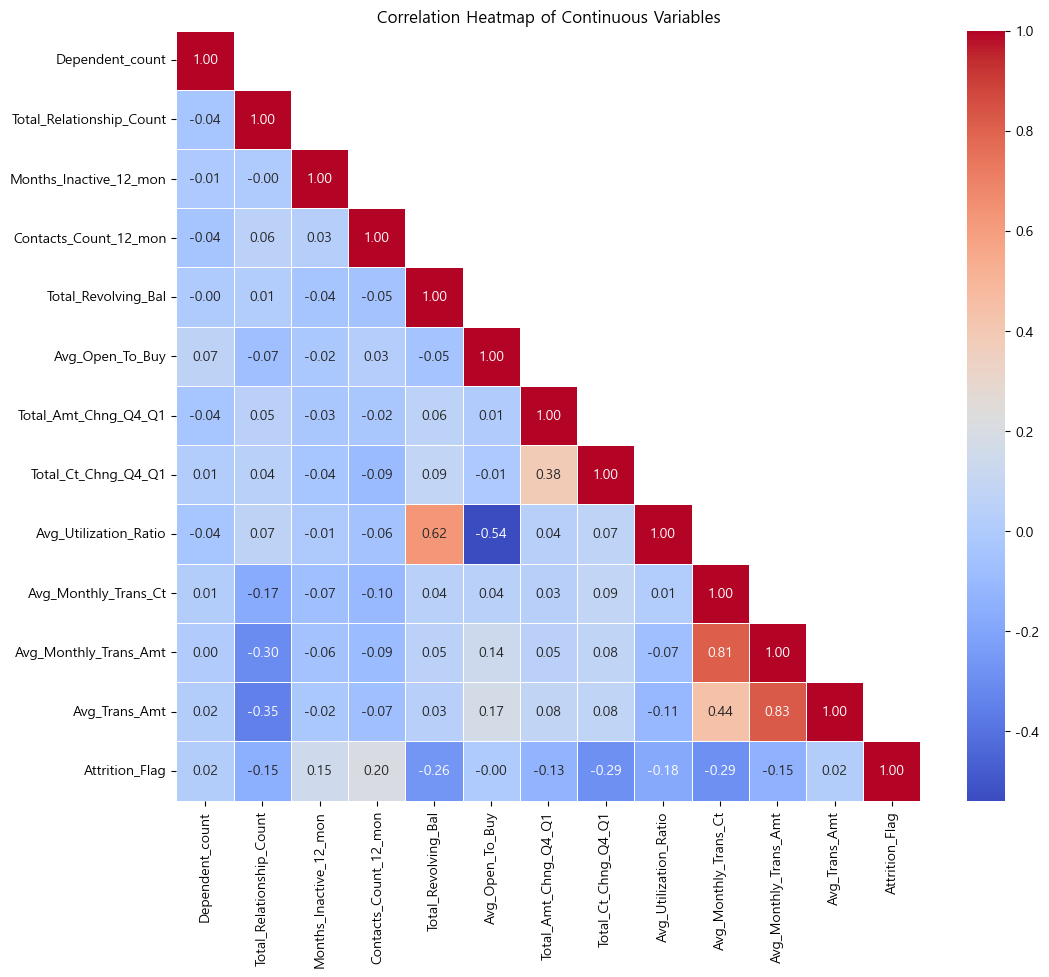

In [144]:
# 상관 행렬 계산
corr_matrix = X_reduced.corr()

# 마스크 생성
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# 히트맵 
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

# print(sum(df.Total_Revolving_Bal == (df.Credit_Limit - df.Avg_Open_To_Buy).astype(int)))
# print(sum(df.Avg_Utilization_Ratio == (df.Total_Revolving_Bal / df.Credit_Limit).round(3)))

In [127]:
# ## PCA 적용
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# # 데이터 표준화
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # PCA 객체 생성
# pca = PCA(n_components=0.95)  # 설명 분산의 95%를 유지하는 주성분 수 선택
# X_pca = pca.fit_transform(X_scaled)

# # 주성분 비율 확인
# explained_variance = pca.explained_variance_ratio_
# print(f'각 주성분의 설명 분산 비율: {explained_variance}')

# # 누적 설명 분산 비율 계산
# cumulative_variance = explained_variance.cumsum()
# print(f'누적 설명 분산 비율: {cumulative_variance}')

In [128]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # 타겟 변수 정의
# y = df['Attrition_Flag'].replace({"Existing Customer": 1, "Attrited Customer":0})  # 타겟 열 이름에 맞게 변경

# # 학습 데이터와 테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# # 로지스틱 회귀 모델 학습
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # 모델 예측 및 평가
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'모델 정확도: {accuracy}')

## 파생변수 생성

In [67]:
## 고객이 신용카드를 보유한 기간 동안 총 거래 금액을 월 단위로 나눈 값
## 월 평균 거래 횟수
df2['Avg_Monthly_Trans_Ct'] = (df['Total_Trans_Ct'] / df['Months_on_book']).round(2)
df2['Avg_Monthly_Trans_Ct'].head()

0    1.08
1    0.75
2    0.56
3    0.59
4    1.33
Name: Avg_Monthly_Trans_Ct, dtype: float64

In [68]:
## 고객이 신용카드를 보유한 기간 동안 총 거래 횟수를 월 단위로 나눈 값
## 월 평균 거래 금액 
df2['Avg_Monthly_Trans_Amt'] = (df['Total_Trans_Amt'] / df['Months_on_book']).round(2)
df2['Avg_Monthly_Trans_Amt'].head()

0    29.33
1    29.34
2    52.42
3    34.44
4    38.86
Name: Avg_Monthly_Trans_Amt, dtype: float64

In [69]:
## 고객의 총 거래 금액을 총 거래 횟수로 나눈 값
## 평균 거래 금액
df2['Avg_Trans_Amt'] = (df['Total_Trans_Amt'] / df['Total_Trans_Ct']).round(2)
df2['Avg_Trans_Amt'].head()

0    27.24
1    39.12
2    94.35
3    58.55
4    29.14
Name: Avg_Trans_Amt, dtype: float64

### VIF 높은 변수 제거

In [24]:
# # VIF가 높은 변수 제거 후의 VIF 확인
# X_reduced = df2.drop(columns=['Attrition_Flag', 'Customer_Age', 'Credit_Limit', 'Months_on_book', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct'])
# vif_after = calculate_vif(X_reduced.select_dtypes(include=np.number))
# vif_after

In [25]:
# X_reduced = df2.drop(columns=['Credit_Limit', 'Months_on_book', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct'])
# X_reduced.replace({"Attrited Customer":1, "Existing Customer":0}, inplace=True) ## 종속 변수 정수형 타입으로 변환
# corr_matrix = X_reduced[list(X_reduced.describe().columns)].corr()

# # 마스크 생성
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# # 히트맵 
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
# plt.title('Correlation Heatmap of Continuous Variables')
# plt.show()

### 비활동 기간 변수 수정 필요 (NA값이 생성됨)

In [26]:
## 비활동 기간 동안 (12개월) 연락 받은 횟수를 나눈 값
## 비활동 기간 동안의 연락 빈도 분석
# df['Contact_Frequency_During_Inactivity'] = df['Contacts_Count_12_mon'] / df['Months_Inactive_12_mon']
# df['Contact_Frequency_During_Inactivity']

# df['Contact_Frequency_During_Inactivity'] = df.apply(
#     lambda row: row['Contacts_Count_12_mon'] / row['Months_Inactive_12_mon'] if row['Months_Inactive_12_mon'] != 0 else None,
#     axis=1
# )
# df['평균_연락_횟수'] = np.where(df['Months_Inactive_12_mon'] == 0, 0,df['Contacts_Count_12_mon'] / df['Months_Inactive_12_mon'])
# df[df['Contact_Frequency_During_Inactivity'].isnull()][['Contacts_Count_12_mon','Months_Inactive_12_mon']]

## 신용 등급 측정
아래를 가지고 점수를 부여해서 등급을 계산하면 좋을 듯
등급은 FICO 기준 대신 그걸 우리한테 대입
1. 연봉
2. 교육 수준
3. 카드 종류
4. 카드 개설 기간 -> 높을수록 좋음 - 최대 56개월
5. 신용 한도 -> 높을수록 좋음 - 34516, 1438
6. 신용 한도 사용율 -> 낮을수록 좋음


FICO 신용 등급 점수의 전체 범위는 300점에서 850점까지 550점.


- Exceptional: 50 / 550 ≈ 0.0909 (약 9.09%)
- Very Good: 60 / 550 ≈ 0.1091 (약 10.91%)
- Good: 70 / 550 ≈ 0.1273 (약 12.73%)
- Fair: 90 / 550 ≈ 0.1636 (약 16.36%)
- Poor: 280 / 550 ≈ 0.5091 (약 50.91%)


이 비율을 바탕으로 2점에서 34점 사이의 점수 구간으로 변환.


2점에서 34점까지의 구간은 34 - 2 = 32점.
- Exceptional: 32 * 0.0909 ≈ 2.91 (약 3점)
- Very Good: 32 * 0.1091 ≈ 3.49 (약 3.5점)
- Good: 32 * 0.1273 ≈ 4.07 (약 4점)
- Fair: 32 * 0.1636 ≈ 5.24 (약 5.2점)
- Poor: 32 * 0.5091 ≈ 16.29 (약 16.3점)

---
- Exceptional: 31 - 34점
- Very Good: 27.5 - 30.99점
- Good: 23.5 - 27.49점
- Fair: 18.3 - 23.49점
- Poor: 2 - 18.29점
Poor: 2 - 18.29점

In [47]:
## 신용 등급 변수 추가
def credit_score(row):
    income_score = {'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5}
    education_score = {'Unknown': 0, 'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 2, 'Post-Graduate': 3, 'Doctorate': 4}
    card_score = {'Blue': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4}
    
    score = (income_score.get(row['Income_Category'], 0) +
             education_score.get(row['Education_Level'], 0) +
             card_score.get(row['Card_Category'], 0) +
             row['Months_on_book'] // 12 + # 1점 = 1년
             row['Credit_Limit'] // 10000 + # 1점 = 10000달러
             (1 - row['Avg_Utilization_Ratio'])) # 사용률이 낮을수록 점수가 높음
    return score
    
df['Credit_Score'] = df.apply(credit_score, axis=1)
df['Credit_Score'].head(10)

0     9.939
1     7.895
2    11.000
3     5.240
4     6.000
5     8.689
6    14.934
7    10.952
8     9.887
9    11.856
Name: Credit_Score, dtype: float64

In [48]:
df['Credit_Score'].describe()

count    10127.000000
mean         8.342071
std          2.607567
min          2.278000
25%          6.432000
50%          7.943000
75%          9.921500
max         19.944000
Name: Credit_Score, dtype: float64

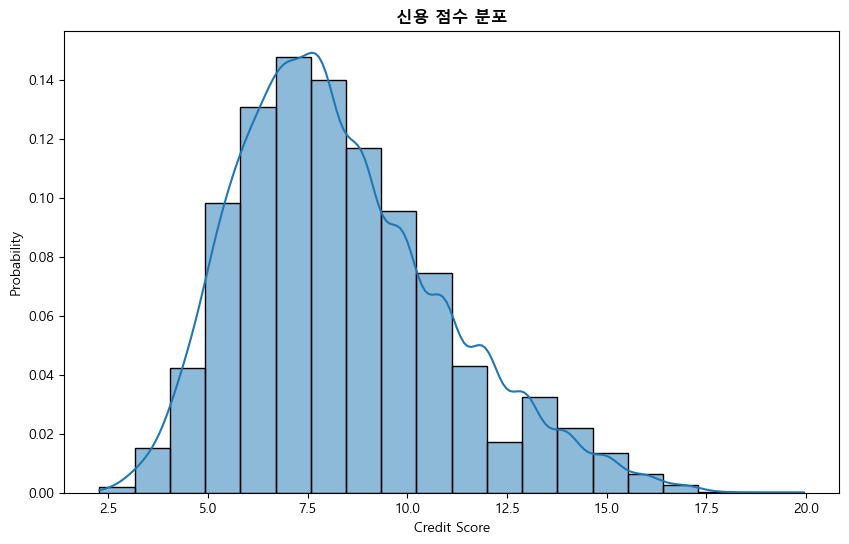

In [62]:
# 각 범주에 따른 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(df['Credit_Score'], bins=20, kde=True, stat='probability')
plt.title('신용 점수 분포', fontweight = 'semibold')
plt.xlabel('Credit Score')
plt.ylabel('Probability')
plt.show()

In [50]:
# 신용 등급 매핑 함수
def get_credit_rating(credit_score):
    if credit_score >= 31:
        return 'Exceptional'
    elif credit_score >= 27.5:
        return 'Very Good'
    elif credit_score >= 23.5:
        return 'Good'
    elif credit_score >= 18.3:
        return 'Fair'
    else:
        return 'Poor'

df['Credit_Rating'] = df['Credit_Score'].apply(get_credit_rating)
df['Credit_Rating'].head(10)

0    Poor
1    Poor
2    Poor
3    Poor
4    Poor
5    Poor
6    Poor
7    Poor
8    Poor
9    Poor
Name: Credit_Rating, dtype: object

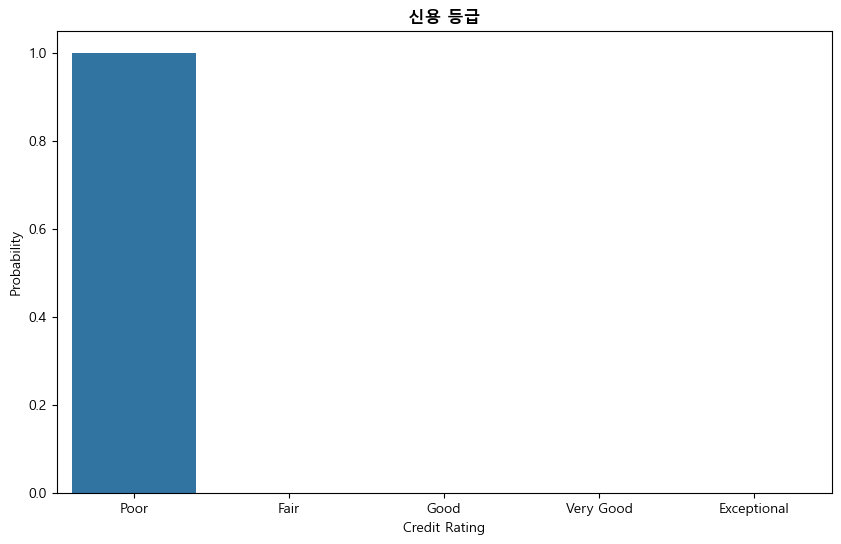

Credit_Rating
Poor    10125
Fair        2
Name: count, dtype: int64


In [63]:
# 각 등급별 고객 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Rating', data=df, order=['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional'], stat='probability')
plt.title('신용 등급', fontweight = 'semibold')
plt.xlabel('Credit Rating')
plt.ylabel('Probability')
plt.show()

# 분포 요약
print(df['Credit_Rating'].value_counts())

여기부터 수정

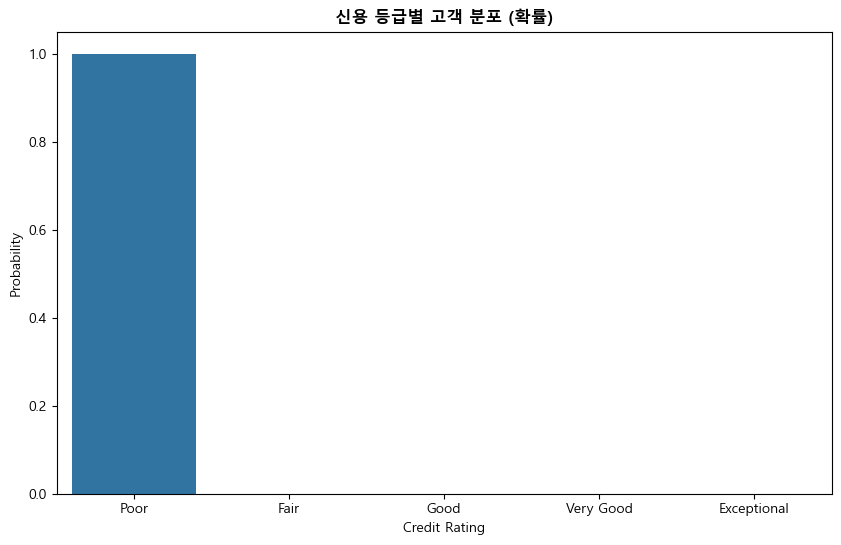

In [64]:
# 신용 등급별 빈도 계산
credit_rating_counts = df['Credit_Rating'].value_counts(normalize=True).reset_index()
credit_rating_counts.columns = ['Credit_Rating', 'Probability']

# 카테고리 순서를 유지하기 위해 'Credit_Rating'을 카테고리형으로 변환
credit_rating_counts['Credit_Rating'] = pd.Categorical(credit_rating_counts['Credit_Rating'], 
                                                       categories=['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional'],
                                                       ordered=True)

# 확률로 표현된 막대 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Credit_Rating', y='Probability', data=credit_rating_counts, order=['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional'])
plt.title('신용 등급별 고객 분포 (확률)', fontweight='semibold')
plt.xlabel('Credit Rating')
plt.ylabel('Probability')
plt.show()

In [ ]:
## 신용 한도 대비 사용 비율 == Avg_Utilization_Ratio 동일한 결과가 나옴 따라서 이미 있음
# df['Credit_Utilization_Ratio'] = ((df['Total_Revolving_Bal'] / df['Credit_Limit']).round(3))
# df['Credit_Utilization_Ratio']

# np.sort(df['Credit_Utilization_Ratio'].unique())
# (df.Avg_Utilization_Ratio == df['Credit_Utilization_Ratio']).sum()

### 파생 변수 visualization

In [40]:
## 원본 데이터 연속형 시각화
def plot_histogram(df, column, bins=20):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue="Attrition_Flag", bins=bins, kde=True, palette='coolwarm', element='step', stat='density') # 'bars', 'step', 'poly'  
    plt.title(f'Histogram of {column}', size=15)
    plt.xlabel(column, size=12)
    plt.ylabel('Frequency', size=12)
    plt.show()

In [41]:
# cols = ['Avg_Monthly_Trans_Ct', 'Avg_Monthly_Trans_Amt', 'Avg_Trans_Amt']
# cols = list(df.describe().columns)

# for col in cols:
#     plot_histogram(df, col)

## 모든 연속형 사분위수를 이용하여 범주화

In [84]:
def data_category(df, col):
    df_stats = df[col].describe()
    cols = df_stats.index[4:].tolist()

    labels = ['min~25%', '25%~50%', '50%~75%', '75%~max']
                 
    bins = df_stats[cols].tolist()
    bins = [-np.inf] + bins
    
    new_df = pd.cut(df[col], bins=bins, labels=labels, right=True)
    df['new_'+col] = new_df.astype(str) 
    
    return df['new_'+col]

In [82]:
## 중복된 값이 있는 컬럼은 삭제
cols = df.describe().columns.tolist()
cols.remove('Customer_Age')  ## 이미 범주화 
cols.remove('Months_on_book') ## 이미 범주화
cols.remove('Contacts_Count_12_mon') ## 중복된 quantile 값이 있음
cols.remove('Months_Inactive_12_mon') ## 중복된 quantile 값이 있음
# cols.remove('Contact_Frequency_During_Inactivity')
cols

['Dependent_count',
 'Total_Relationship_Count',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [85]:
## 연속형 데이터 범주화
for col in cols:
    data_category(df, col)

# 이탈 그룹 vs 비이탈 그룹 분할

In [86]:
## 두 그룹의 데이터 추출
attrited = df[df['Attrition_Flag'] == "Attrited Customer"]
existing = df[df['Attrition_Flag'] == "Existing Customer"]

## 인덱스 초기화
attrited.reset_index(drop=True, inplace=True)
existing.reset_index(drop=True, inplace=True)

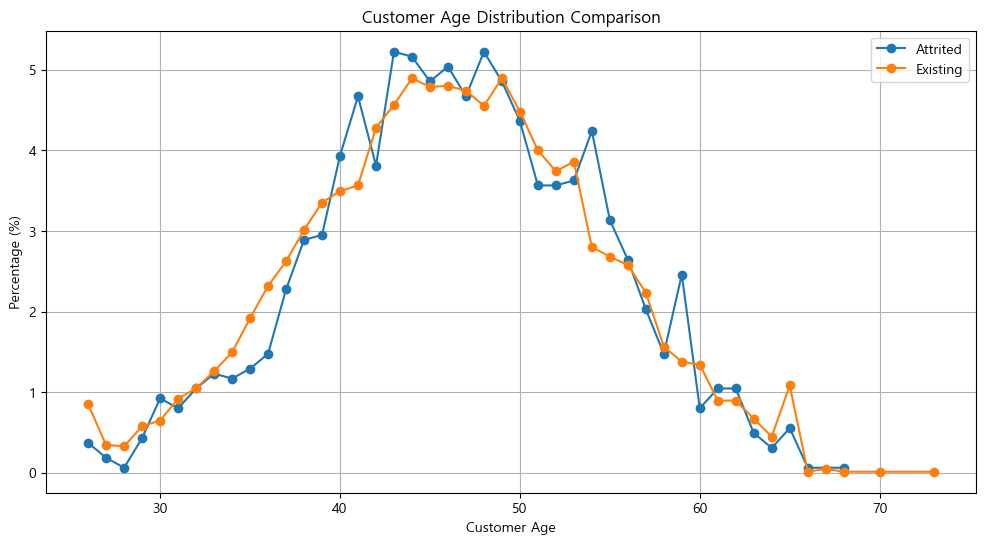

In [87]:
# 백분율 계산
g_a = attrited.groupby('Customer_Age').size() / len(attrited) * 100
g_b = existing.groupby('Customer_Age').size() / len(existing) * 100

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(g_a.index, g_a.values, marker='o', linestyle='-', label='Attrited')
plt.plot(g_b.index, g_b.values, marker='o', linestyle='-', label='Existing')
plt.title('Customer Age Distribution Comparison')
plt.xlabel('Customer Age')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.show()

## 이탈 집단 특성

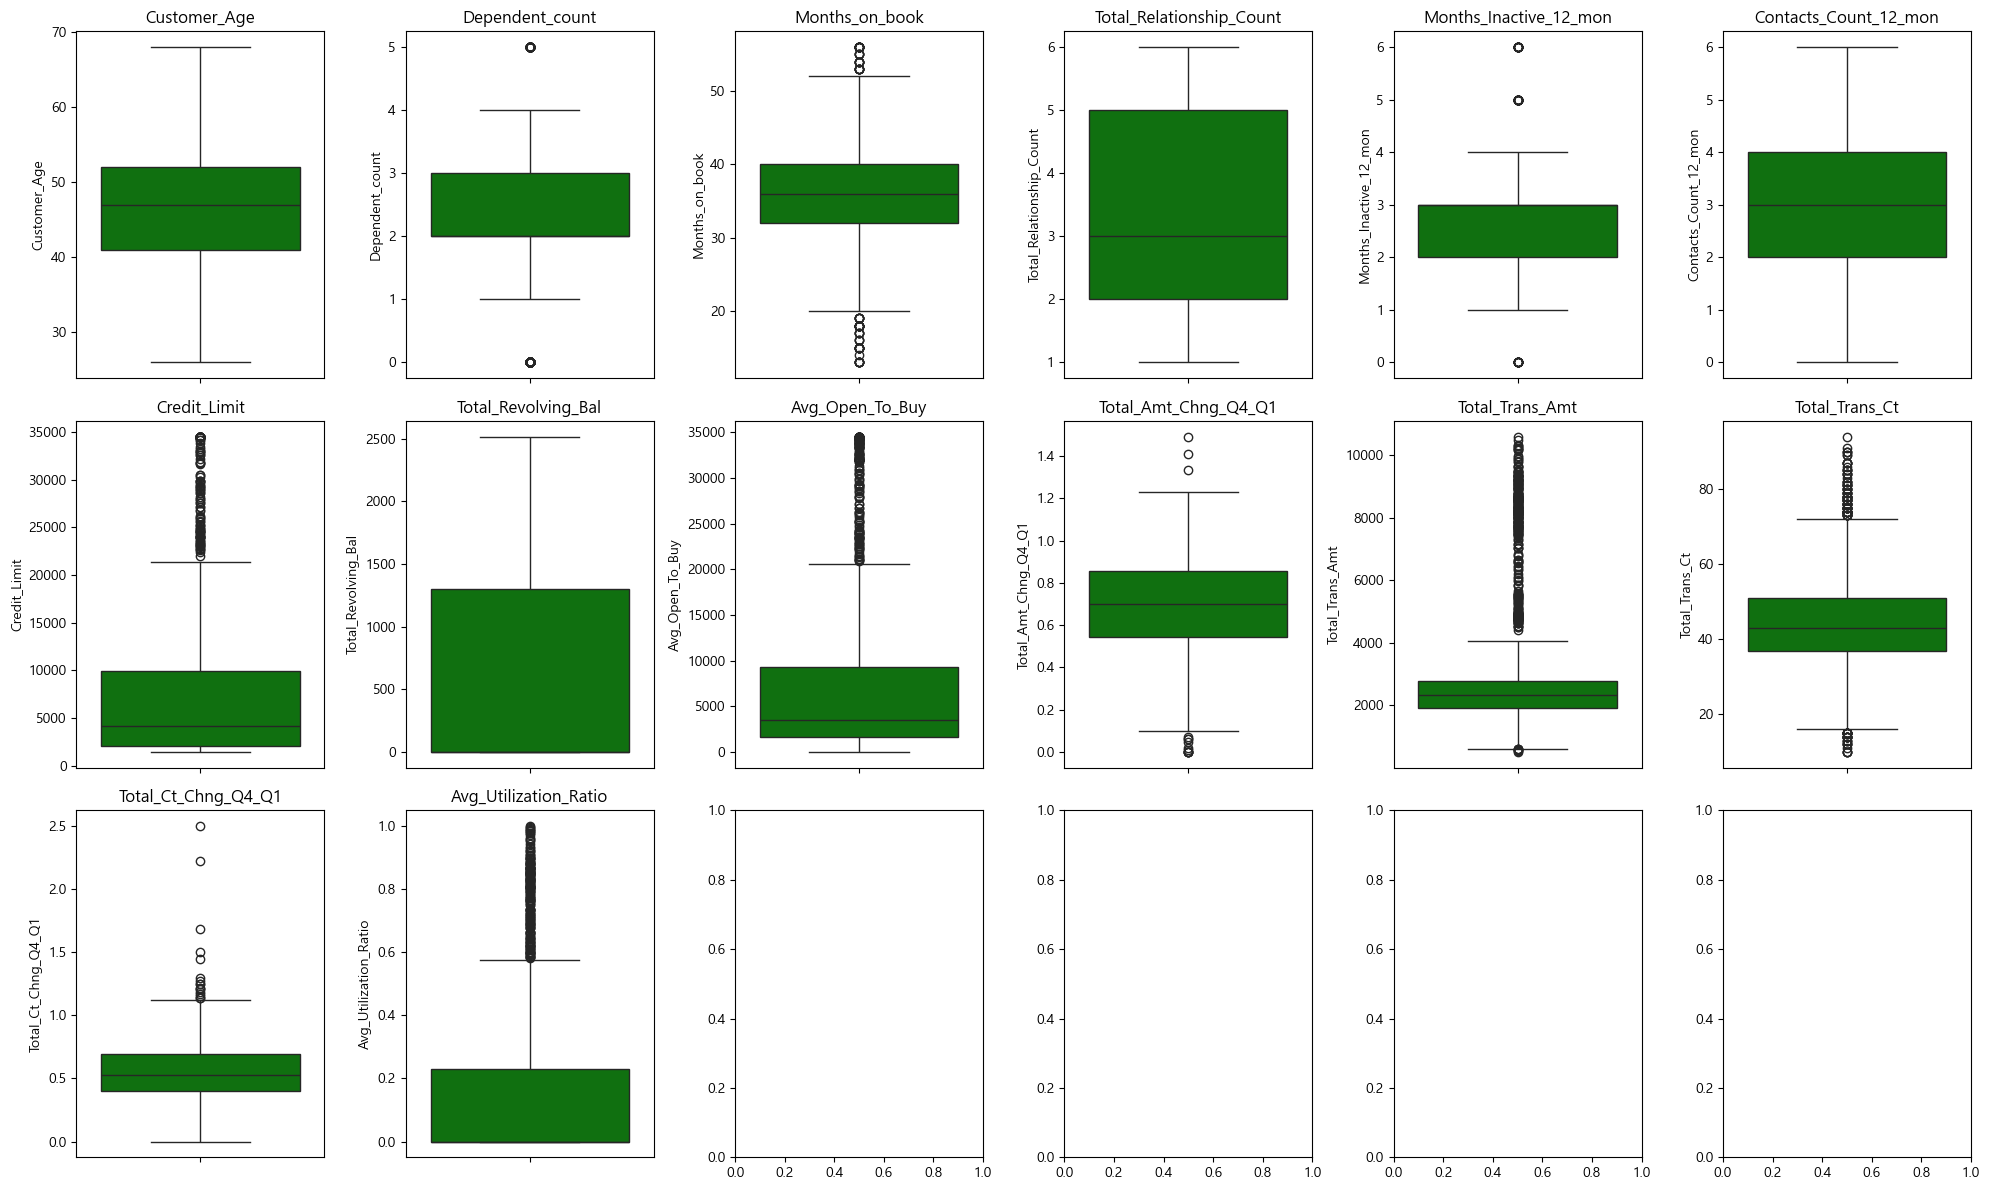

In [88]:
cols = list(attrited.describe().columns)
fig, axes = plt.subplots(3, 6, figsize=(20, 12))

## 박스플롯
for i in range(len(cols)):
    sns.boxplot(y=attrited[cols[i]], ax=axes[i//6, i%6], color='g') 
    axes[i//6, i%6].set_title(cols[i])

plt.tight_layout()
plt.show()

### **밑에 코드를 통해서 `이탈 집단`에서 어떤 변수가 분석할 특징을 나타내는지 확인할 수 있을 것으로 판단된다.**
### 특징 변수
- new_Total_Trans_ct => min~25% 구간에서 제일 많은 이탈자를 보인다.
- 카드 종류 => blue 카드를 사용하는 고객이 이탈이 많다. (그 인원이 많기 때문?) 인원이 많다면 그 blue 고객을 기준으로 또 비교하면 된다.
- new_Total_Revolving_Bal => ~ min 고객이 매우 많다.
- new_Total_Ct_Chng_Q4_Q1 => min~25% 구간에서 제일 많은 이탈율을 보인다.
- Months_on_books_group => 3년이상4년 미만 고객자가 제일 많은 이탈율을 보인다.
- new_Avg_Utilization_Ratio => ~min
- new_Transcation_Per_Month => min~25%
- new_Utilization_Ratio => ~min

In [ ]:
## 한 개씩 출력
cols = list(df.describe(include='O').columns[1:]) ## Attrition_Flag를 제외하고 출력
fig, axes = plt.subplots(5, 5, figsize=(16, 20))

for i, col in enumerate(cols):  
    counts = attrited[col].value_counts(normalize=True).values
    categories = attrited[col].value_counts(normalize=True).index
    
    sns.barplot(x=categories, y=counts, ax=axes[i//5, i%5])
    axes[i//5, i%5].tick_params(axis='x', rotation=45)
    axes[i//5, i%5].set_title(col)
    
plt.tight_layout()
plt.show()

## 비이탈 집단 박스플롯

In [ ]:
cols = list(existing.describe().columns)
fig, axes = plt.subplots(4, 6, figsize=(20, 12))

## seaborn
for i in range(len(cols)):
    sns.boxplot(y=existing[cols[i]], ax=axes[i//6, i%6], color='g') 
    axes[i//6, i%6].set_title(cols[i])

plt.tight_layout()
plt.show()

# 이탈 그룹 vs 비이탈 그룹 시각화

In [ ]:
def bar_plot(df_a, df_b, col):
    grouped_a = df_a.groupby(col).size() / len(df_a) * 100
    grouped_b = df_b.groupby(col).size() / len(df_b) * 100
    
    result = pd.DataFrame({'existing %': grouped_a, 'attrited %': grouped_b})
    result.plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

## 여기에서 비이탈 vs 이탈의 차이를 파악할 수 있는 변수를 찾아서 해당 변수들끼리 관계를 살펴볼 수 있다.

In [ ]:
# cols = list(df.describe(include='O').columns[1:])
# fig, axes = plt.subplots(5, 5, figsize=(18, 24))

# ## 5개씩 출력 한 번에 비교하기 용이
# for i in range(len(cols)):
#     grouped_a = existing.groupby(cols[i]).size() / len(existing) * 100
#     grouped_b = attrited.groupby(cols[i]).size() / len(attrited) * 100
        
#     result = pd.DataFrame({'비이탈': grouped_a, '이탈': grouped_b})
#     result.plot(kind='bar', ax=axes[i//5, i%5])
    
#     plt.xlabel(cols[i])
#     plt.ylabel('Percentage (%)')
#     axes[i//5, i%5].set_title(cols[i])
#     axes[i//5, i%5].tick_params(axis='x', rotation=45)
    
# plt.tight_layout()
# plt.show()

### 전체 데이터셋에서 비율을 확인

In [ ]:
# Data visualization
## 타입이 오브젝트
def eda_object(data, x, hue="Attrition_Flag"):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=x, hue=hue, stat='probability') # {‘count’, ‘percent’, ‘proportion’, ‘probability’}
    plt.title(x)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# cols = list(df.describe(include='O').columns)
# for col in cols:
#     eda_object(df, x=col)

### **연속형 변수들 정규화 비율 분포 시각화**

In [ ]:
# # Data visualization
# ### 타입이 연속형
# def plot_histogram(df, column, bins=30):
#     plt.figure(figsize=(8, 6))
#     sns.histplot(data=df, x=column, hue="Attrition_Flag", bins=bins, kde=True, palette='coolwarm', element='step', stat='density') # 'bars', 'step', 'poly' 
#     plt.title(f'Histogram of {column}', size=15)
#     plt.xlabel(column, size=12)
#     plt.ylabel('Frequency', size=12)
#     plt.show()

In [ ]:
# cols = list(df.describe().columns)
# for col in cols:
#     plot_histogram(df, col)

### 이탈 비이탈 샘플 수 맞춰서 시각화

In [ ]:
attrited_count = len(df[df['Attrition_Flag'] == "Attrited Customer"])
existing_count = len(df[df['Attrition_Flag'] == "Existing Customer"])

print("Attrited customer count:", attrited_count)
print("Existing customer count:", existing_count)

In [ ]:
# 'Existing Customer' 그룹에서 'Attrited Customer' 그룹의 샘플 수만큼 샘플링
existing_downsampled = df[df['Attrition_Flag'] == "Existing Customer"].sample(attrited_count)

# 다운 샘플링된 'Existing Customer' 그룹과 'Attrited Customer' 그룹을 합침
df_downsampled = pd.concat([existing_downsampled, df[df['Attrition_Flag'] == "Attrited Customer"]])

# 결과 확인
print(df_downsampled['Attrition_Flag'].value_counts())

In [ ]:
cols = ['Credit_to_Age_Ratio', 'Transaction_Per_Month', 'Inactive_Ratio', 'Utilization_Ratio', 'Contact_Frequency', 'Avg_Transaction_Per_Relationship']
for col in cols:
    plot_histogram(df_downsampled, col)